In [1]:
import numpy as np
import pandas as pd


In [2]:
#Membaca data
ekonom = pd.read_csv("2019.csv")
ekonom.head()

,PROVINSI,LajuPE,PersentaseTK,IPM,PersentasePenduduk,PersentaseEkspor
0,ACEH,4.14,42.88,71.90,1.991781,1.166967
1,SUMATERA UTARA,5.22,45.00,71.74,5.484731,1.435534
2,SUMATERA BARAT,5.01,37.87,72.39,2.052925,0.696819
3,RIAU,2.81,47.78,73.00,2.560808,3.832282
4,JAMBI,4.37,42.94,71.26,1.336096,1.235603


In [3]:
#informasi data
ekonom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PROVINSI            34 non-null     object 
 1   LajuPE              34 non-null     float64
 2   PersentaseTK        34 non-null     float64
 3   IPM                 34 non-null     float64
 4   PersentasePenduduk  34 non-null     float64
 5   PersentaseEkspor    34 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.7+ KB


#Data Preprocessing


In [4]:
#Menampilkan semua nama kolom
ekonom.columns

Index(['PROVINSI', 'LajuPE', 'PersentaseTK', 'IPM', 'PersentasePenduduk',
       'PersentaseEkspor'],
      dtype='object')

In [5]:
#Mengecek NA/NULL
ekonom.isnull().any()

PROVINSI              False
LajuPE                False
PersentaseTK          False
IPM                   False
PersentasePenduduk    False
PersentaseEkspor      False
dtype: bool

In [6]:
#Ukuran data
ekonom.shape

(34, 6)

In [7]:
#Deskripsi(stat des) data homefix untuk variabel numerik
ekonom.describe()

,LajuPE,PersentaseTK,IPM,PersentasePenduduk,PersentaseEkspor
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,4.686471,43.417353,71.040294,2.941176,2.941176
std,3.805828,10.768911,3.913203,4.183463,7.466723
min,-15.750000,20.710000,60.840000,0.260610,0.007349
25%,4.765000,37.907500,69.462500,0.863478,0.156737
50%,5.275000,42.445000,71.235000,1.514526,1.187075
75%,5.787500,48.825000,72.300000,3.016716,2.344913
max,8.830000,70.430000,80.760000,18.366809,40.008575


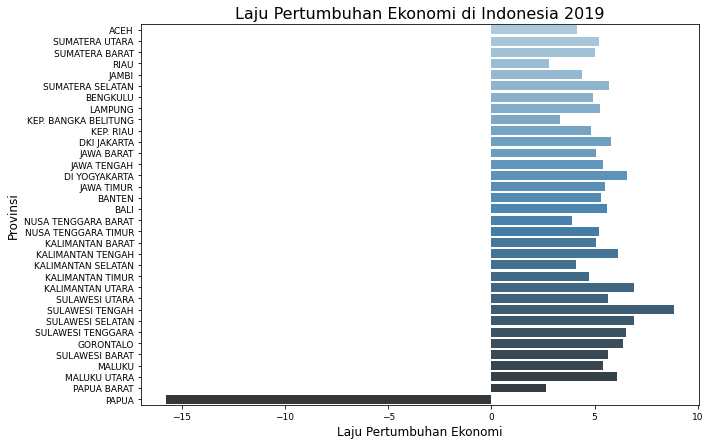

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
#set ukuran plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

a = sns.barplot(x = "LajuPE", y = "PROVINSI", data = ekonom, palette = "Blues_d")

#set label
a.set_xlabel("Laju Pertumbuhan Ekonomi", fontsize = 12)
a.set_ylabel("Provinsi", fontsize = 12)
a.axes.set_title("Laju Pertumbuhan Ekonomi di Indonesia 2019", fontsize=16)
a.tick_params(labelsize = 9)

#tampilkan plot
plt.show()

In [9]:
import plotly.graph_objects as go
import plotly.express as px
fig1 = px.bar(ekonom[1:34], y='LajuPE', x='PROVINSI', text='LajuPE', color='PROVINSI')
# Put bar total value above bars with 2 values of precision
fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig1.update_layout(uniformtext_minsize=8)
# Rotate labels 45 degrees
fig1.update_layout(xaxis_tickangle=0)
fig1

# EDA (Exploratory Data Analysis)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

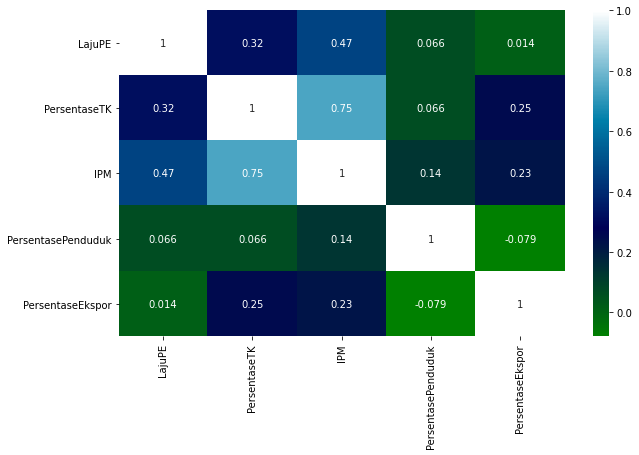

In [11]:
#Heatmap untuk korelasi
plt.figure(figsize=(10,6))
sns.heatmap(ekonom.corr(), annot=True, cmap="ocean")

#Korelasi
home.corr().LajuPE.sort_values(ascending=False)

In [12]:
#Korelasi
ekonom.corr().LajuPE.sort_values(ascending=False)

LajuPE                1.000000
IPM                   0.471806
PersentaseTK          0.320627
PersentasePenduduk    0.065544
PersentaseEkspor      0.013849
Name: LajuPE, dtype: float64

In [13]:
#buang Persentase Penuduk dan Ekspor
xx = ekonom.drop('PersentaseEkspor',axis=1)
ekonomi = xx.drop('PersentasePenduduk',axis=1)
ekonomi.head()

,PROVINSI,LajuPE,PersentaseTK,IPM
0,ACEH,4.14,42.88,71.90
1,SUMATERA UTARA,5.22,45.00,71.74
2,SUMATERA BARAT,5.01,37.87,72.39
3,RIAU,2.81,47.78,73.00
4,JAMBI,4.37,42.94,71.26


In [14]:
#menentukan data yg di cluster
x=ekonomi.iloc[:,1:4]
x.head()

,LajuPE,PersentaseTK,IPM
0,4.14,42.88,71.90
1,5.22,45.00,71.74
2,5.01,37.87,72.39
3,2.81,47.78,73.00
4,4.37,42.94,71.26


In [15]:
#mengubah data jadi array
x_array=np.array(x)
x_array

array([[  4.14,  42.88,  71.9 ],
       [  5.22,  45.  ,  71.74],
       [  5.01,  37.87,  72.39],
       [  2.81,  47.78,  73.  ],
       [  4.37,  42.94,  71.26],
       [  5.69,  39.48,  70.02],
       [  4.94,  34.88,  71.21],
       [  5.26,  31.51,  69.57],
       [  3.32,  53.18,  71.3 ],
       [  4.84,  70.43,  75.48],
       [  5.82,  68.65,  80.76],
       [  5.07,  49.8 ,  72.03],
       [  5.4 ,  42.01,  71.73],
       [  6.59,  48.36,  79.99],
       [  5.52,  39.36,  71.5 ],
       [  5.29,  57.86,  72.44],
       [  5.6 ,  50.54,  75.38],
       [  3.9 ,  28.98,  68.14],
       [  5.24,  27.74,  65.23],
       [  5.09,  39.89,  67.65],
       [  6.12,  48.98,  70.91],
       [  4.08,  43.18,  70.72],
       [  4.74,  58.24,  76.61],
       [  6.9 ,  53.31,  71.15],
       [  5.65,  45.19,  72.99],
       [  8.83,  37.03,  69.5 ],
       [  6.91,  39.45,  71.66],
       [  6.5 ,  37.45,  71.2 ],
       [  6.4 ,  41.34,  68.49],
       [  5.67,  28.09,  65.73],
       [  

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
#Scaling data
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x_array)
x_scaled

array([[0.80919447, 0.44589702, 0.55522088],
       [0.85313263, 0.4885358 , 0.54718876],
       [0.8445891 , 0.34513274, 0.57981928],
       [0.75508544, 0.54444891, 0.61044177],
       [0.81855167, 0.44710378, 0.52309237],
       [0.87225386, 0.37751408, 0.46084337],
       [0.84174125, 0.28499598, 0.52058233],
       [0.85475997, 0.21721641, 0.43825301],
       [0.77583401, 0.65305712, 0.5251004 ],
       [0.8376729 , 1.        , 0.73493976],
       [0.87754272, 0.96419952, 1.        ],
       [0.84703011, 0.58507643, 0.56174699],
       [0.86045566, 0.42839903, 0.54668675],
       [0.908869  , 0.55611424, 0.96134538],
       [0.86533767, 0.37510056, 0.53514056],
       [0.85598047, 0.74718423, 0.58232932],
       [0.86859235, 0.59995977, 0.72991968],
       [0.79943043, 0.16633146, 0.36646586],
       [0.8539463 , 0.14139179, 0.22038153],
       [0.84784378, 0.38576026, 0.34186747],
       [0.88974776, 0.56858407, 0.50552209],
       [0.80675346, 0.45193081, 0.49598394],
       [0.

In [17]:
#function returns WSS score for k values from 1 to kmax

def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [18]:
wss=calculate_WSS(x_scaled, 15)

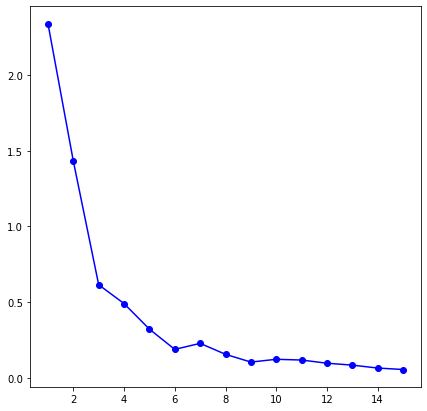

In [19]:
#plot elbow
xx=np.arange(1,16,1)
plt.figure(figsize=[7,7])
plt.plot(xx,wss, "b-o")
plt.show()

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4]

def silh(X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=300, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3771932604722703
For n_clusters = 3 The average silhouette_score is : 0.4266416183843255
For n_clusters = 4 The average silhouette_score is : 0.32499703012358233


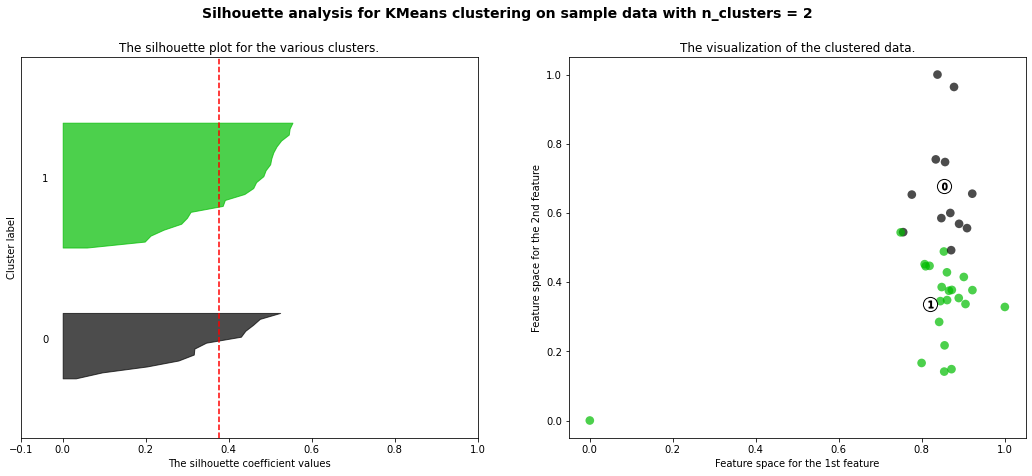

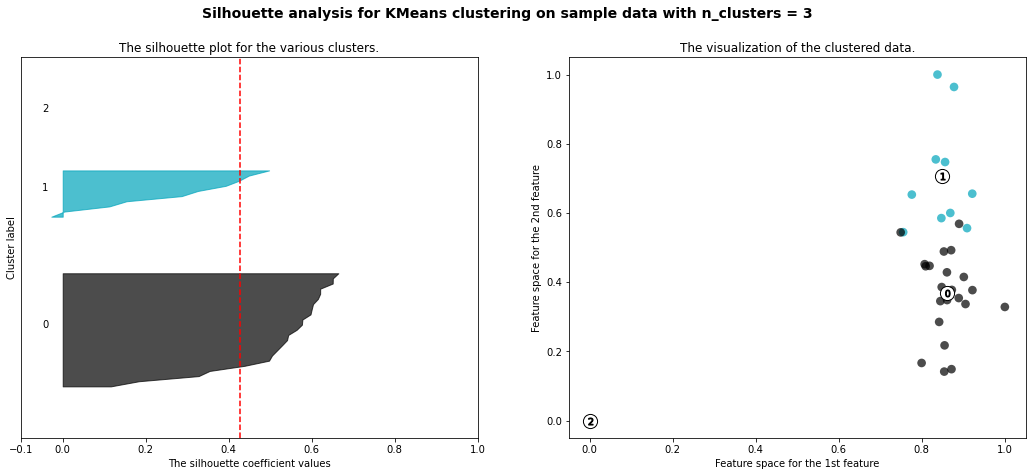

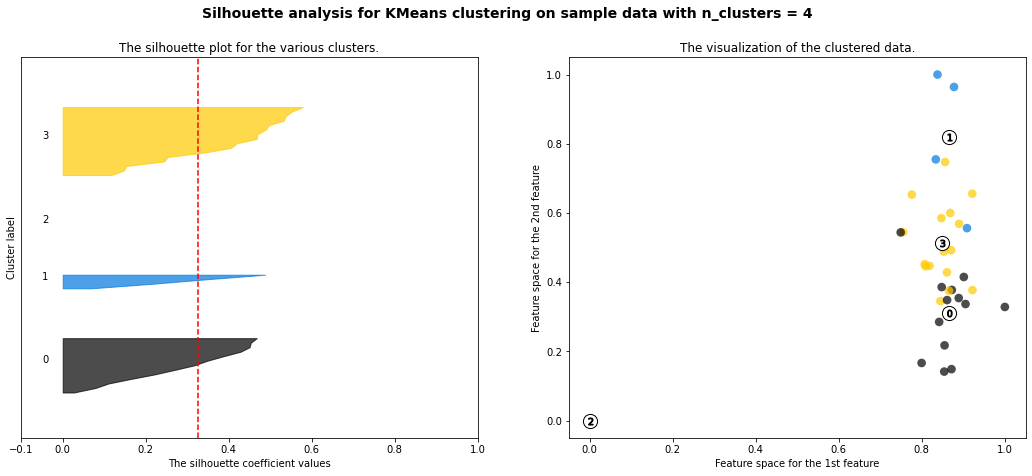

In [21]:
silh(x_scaled)

In [22]:
#menentukan model cluster
kmeans = KMeans(n_clusters = 3, random_state=123)

In [23]:
#menginput data pada model
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [24]:
# label cluster
kmeans.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2])

In [25]:
#pusat cluster
kmeans.cluster_centers_

array([[0.86029646, 0.36814859, 0.45196001],
       [0.84816924, 0.7060539 , 0.70150602],
       [0.        , 0.        , 0.        ]])

In [26]:
#menambahkan label pada data frame
ekonomi['cluster'] = kmeans.labels_
ekonomi.head

<bound method NDFrame.head of                 PROVINSI  LajuPE  PersentaseTK    IPM  cluster
0                   ACEH    4.14         42.88  71.90        0
1         SUMATERA UTARA    5.22         45.00  71.74        0
2         SUMATERA BARAT    5.01         37.87  72.39        0
3                   RIAU    2.81         47.78  73.00        1
4                  JAMBI    4.37         42.94  71.26        0
5       SUMATERA SELATAN    5.69         39.48  70.02        0
6               BENGKULU    4.94         34.88  71.21        0
7                LAMPUNG    5.26         31.51  69.57        0
8   KEP. BANGKA BELITUNG    3.32         53.18  71.30        1
9              KEP. RIAU    4.84         70.43  75.48        1
10           DKI JAKARTA    5.82         68.65  80.76        1
11            JAWA BARAT    5.07         49.80  72.03        1
12           JAWA TENGAH    5.40         42.01  71.73        0
13         DI YOGYAKARTA    6.59         48.36  79.99        1
14            JAWA TIMUR 

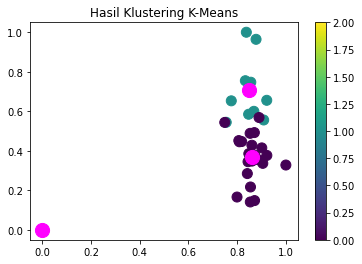

In [27]:
cluster = kmeans.labels_
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = cluster, marker = "o", alpha = 1 )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="magenta", s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar(output)
plt.show()

In [28]:
grup=ekonomi.groupby("cluster")

In [29]:
profil = pd.DataFrame(grup.mean())
profil

,LajuPE,PersentaseTK,IPM
cluster,,,
0,5.396087,39.014348,69.843043
1,5.098000,55.815000,74.814000
2,-15.750000,20.710000,60.840000


In [30]:
profil["cluster"]=profil.index

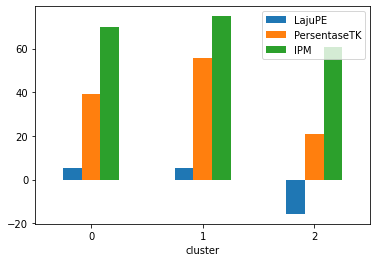

In [31]:
profil.plot(x="cluster", y=["LajuPE", "PersentaseTK","IPM"], kind="bar")
plt.xticks(rotation=0)
plt.show()

In [32]:
# Anggota cluster 0
ekonomi[ekonomi.cluster == 0]

,PROVINSI,LajuPE,PersentaseTK,IPM,cluster
0,ACEH,4.14,42.88,71.90,0
1,SUMATERA UTARA,5.22,45.00,71.74,0
2,SUMATERA BARAT,5.01,37.87,72.39,0
4,JAMBI,4.37,42.94,71.26,0
5,SUMATERA SELATAN,5.69,39.48,70.02,0
6,BENGKULU,4.94,34.88,71.21,0
7,LAMPUNG,5.26,31.51,69.57,0
12,JAWA TENGAH,5.40,42.01,71.73,0
14,JAWA TIMUR,5.52,39.36,71.50,0
17,NUSA TENGGARA BARAT,3.90,28.98,68.14,0


In [33]:
# Anggota cluster 1
ekonomi[ekonomi.cluster == 1]

,PROVINSI,LajuPE,PersentaseTK,IPM,cluster
3,RIAU,2.81,47.78,73.00,1
8,KEP. BANGKA BELITUNG,3.32,53.18,71.30,1
9,KEP. RIAU,4.84,70.43,75.48,1
10,DKI JAKARTA,5.82,68.65,80.76,1
11,JAWA BARAT,5.07,49.80,72.03,1
13,DI YOGYAKARTA,6.59,48.36,79.99,1
15,BANTEN,5.29,57.86,72.44,1
16,BALI,5.60,50.54,75.38,1
22,KALIMANTAN TIMUR,4.74,58.24,76.61,1
23,KALIMANTAN UTARA,6.90,53.31,71.15,1


In [34]:
# Anggota cluster 2
ekonomi[ekonomi.cluster == 2]

,PROVINSI,LajuPE,PersentaseTK,IPM,cluster
33,PAPUA,-15.75,20.71,60.84,2


In [35]:
ekonomi.to_csv("2019hasil.csv")